
# The Matlab Script Called "Prepare_CWT.m" Needs to be Run First to get the Band-Pass Filter and CWT Scale Data.




/tmp/ipykernel_84536/1808377373.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(r'./data-' +str(eq) + '.mat')


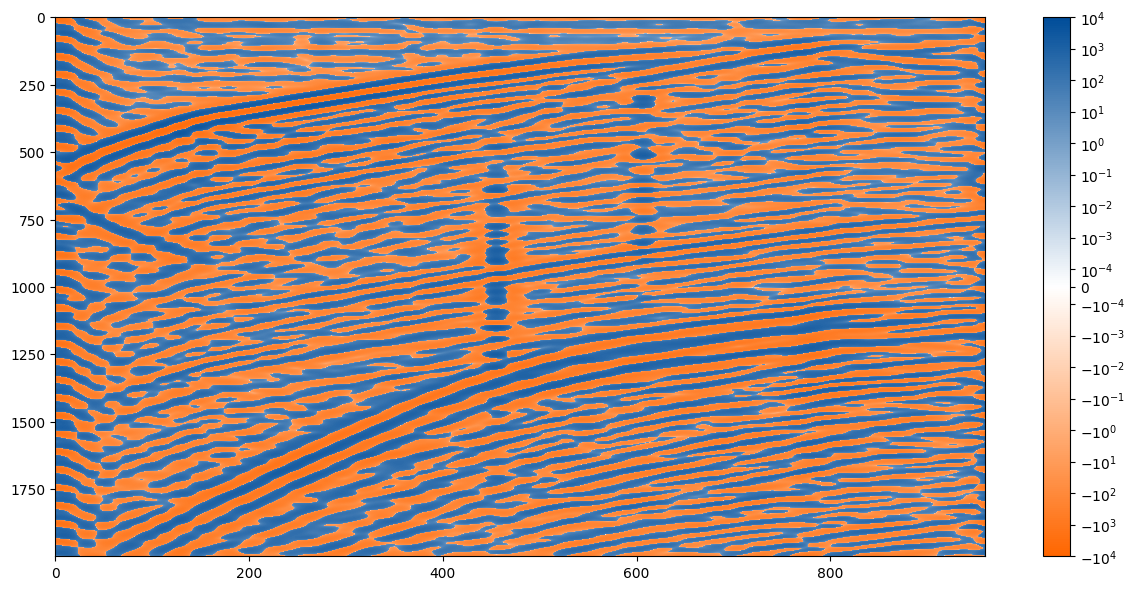

In [1]:
import numpy as np
import h5py
from matplotlib import pylab as plt

from matplotlib.colors import SymLogNorm
import sys
sys.path.append("../notebooks/")
from Utils.cmap import cmaps

# Reading BP and CWT SCale of the DAS data (FORGE Example).
eq = 68
f = h5py.File(r'./data-' +str(eq) + '.mat')
BP = np.array(np.transpose(f.get('outF')))
CWTSCALE = np.array(np.transpose(f.get('out')))

#Plotting BP DAS Data.
plt.figure(figsize=(15,7))
plt.imshow(BP, cmap=cmaps['bluorange'], 
           norm=SymLogNorm(linthresh=1e-4, linscale=0.5, vmin=-1e4, vmax=1e4, base=10))
plt.axis('tight')
plt.colorbar();


#Plotting CWT DAS Data.
plt.figure(figsize=(15,7))
plt.imshow(CWTSCALE, cmap=cmaps['bluorange'], 
           norm=SymLogNorm(linthresh=1e-4, linscale=0.5, vmin=-1e4, vmax=1e4, base=10))
plt.axis('tight')
plt.colorbar();

# Train the DL Model in an Unsupervised Manner (No Lebels are Required).




In [2]:
from fk import *
import sys
sys.path.append("../notebooks/")
from Utils.DLModel import *
# Set the DL Parameters
# Patch Size and Number of Shift Samples
w1 = 48
w2 = 48
s1z = 8
s2z = 8
# Set the Number of Neurons Per First Encoder Layer.
D1 = 1024
# Set the Number of Epoch and Batch Size.
epochs = 100
batch_size = 128

# Training the NEtwork in an Unsupervised Manner.
outB = Train(CWTSCALE,BP,epochs,batch_size,w1,w2,s1z,s2z,D1,eq)

# After DL Denoising, Applying the dip filter in fk.
d2 = outB - fkdip(outB,0.02)
np.save('../outputs/Denoised_eq-' + str(eq) + '_Matlab_CWT.npy', d2)

2023-12-11 17:24:27.365825: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-11 17:24:29.133669: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-11 17:24:29.134639: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-11 17:24:29.172838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.71GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-12-11 17:24:29.172869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-11 17:24:29.174424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.1

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer1 (InputLayer)       [(None, 2304, 1)]    0                                            
__________________________________________________________________________________________________
input_layer2 (InputLayer)       [(None, 2304, 1)]    0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2304, 2)      0           input_layer1[0][0]               
                                                                 input_layer2[0][0]               
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 2304)         0           concatenate[0][0]            

2023-12-11 17:24:31.997332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-11 17:24:32.014754: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2100000000 Hz


Epoch 1/100


2023-12-11 17:24:33.796524: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


221/221 [==============================] - 7s 21ms/step - loss: 6.9614 - mse: 145.5481
Epoch 2/100
221/221 [==============================] - 5s 21ms/step - loss: 5.8929 - mse: 113.0109
Epoch 3/100
221/221 [==============================] - 5s 22ms/step - loss: 5.7129 - mse: 107.4123
Epoch 4/100
221/221 [==============================] - 5s 24ms/step - loss: 5.5423 - mse: 102.6159
Epoch 5/100
221/221 [==============================] - 6s 27ms/step - loss: 5.3726 - mse: 99.2647
Epoch 6/100
221/221 [==============================] - 6s 26ms/step - loss: 5.1830 - mse: 94.2399
Epoch 7/100
221/221 [==============================] - 5s 24ms/step - loss: 5.0010 - mse: 90.1207
Epoch 8/100
221/221 [==============================] - 5s 22ms/step - loss: 4.9510 - mse: 91.4987
Epoch 9/100
221/221 [==============================] - 5s 22ms/step - loss: 4.8658 - mse: 89.0718
Epoch 10/100
221/221 [==============================] - 5s 22ms/step - loss: 4.7931 - mse: 87.6037
Epoch 11/100
221/221 [=====

221/221 [==============================] - 5s 21ms/step - loss: 3.2027 - mse: 65.7286
Epoch 84/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1901 - mse: 62.8961
Epoch 85/100
221/221 [==============================] - 5s 22ms/step - loss: 3.2053 - mse: 63.7234
Epoch 86/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1934 - mse: 64.2835
Epoch 87/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1721 - mse: 63.2770
Epoch 88/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1927 - mse: 65.7007
Epoch 89/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1728 - mse: 61.6975
Epoch 90/100
221/221 [==============================] - 5s 20ms/step - loss: 3.1950 - mse: 65.8175
Epoch 91/100
221/221 [==============================] - 5s 20ms/step - loss: 3.1668 - mse: 63.8584
Epoch 92/100
221/221 [==============================] - 5s 21ms/step - loss: 3.1705 - mse: 63.4268
Epoch 93/100
221/221 [=

NameError: name 'fkdip' is not defined

# Plotting the Results.


/tmp/ipykernel_84536/1815018733.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(r'../data/eq-' +str(eq) + '.mat')


Text(0.5, 1.0, 'Remove Noise Section')

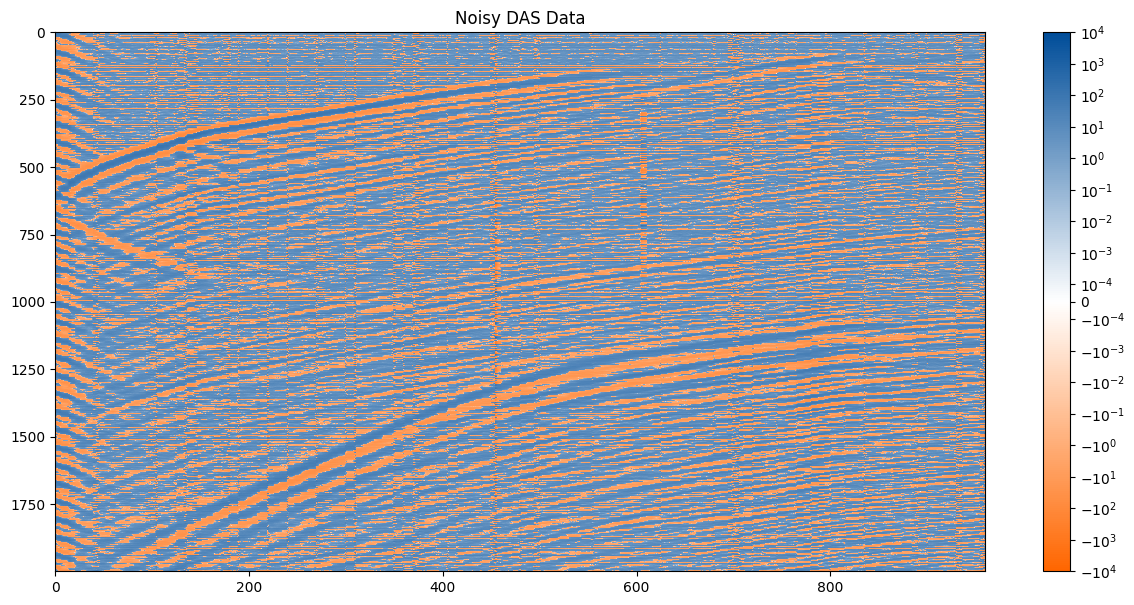

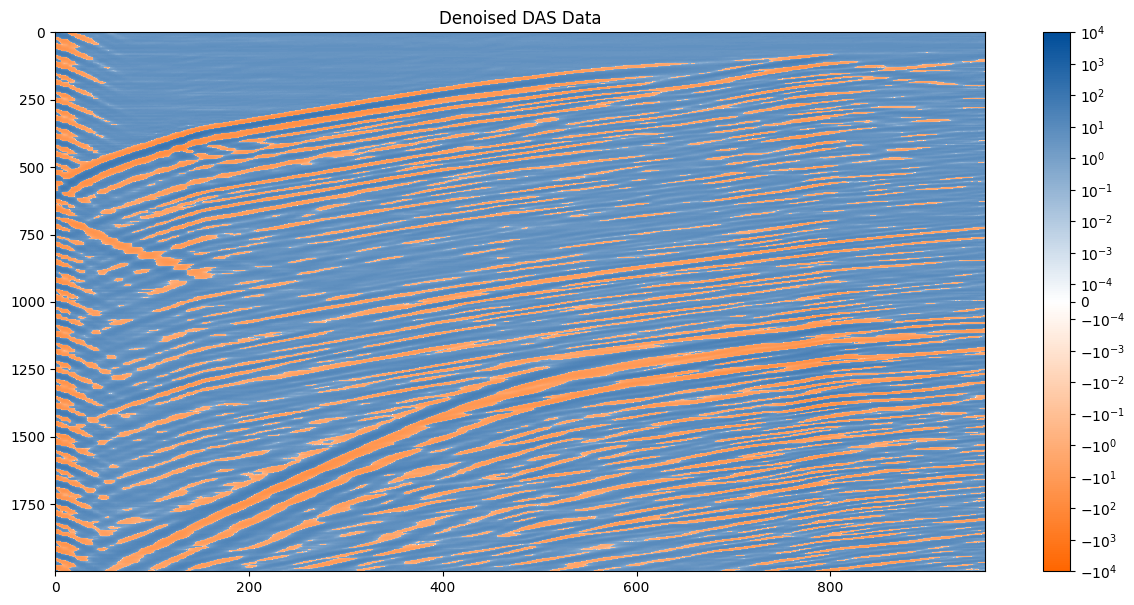

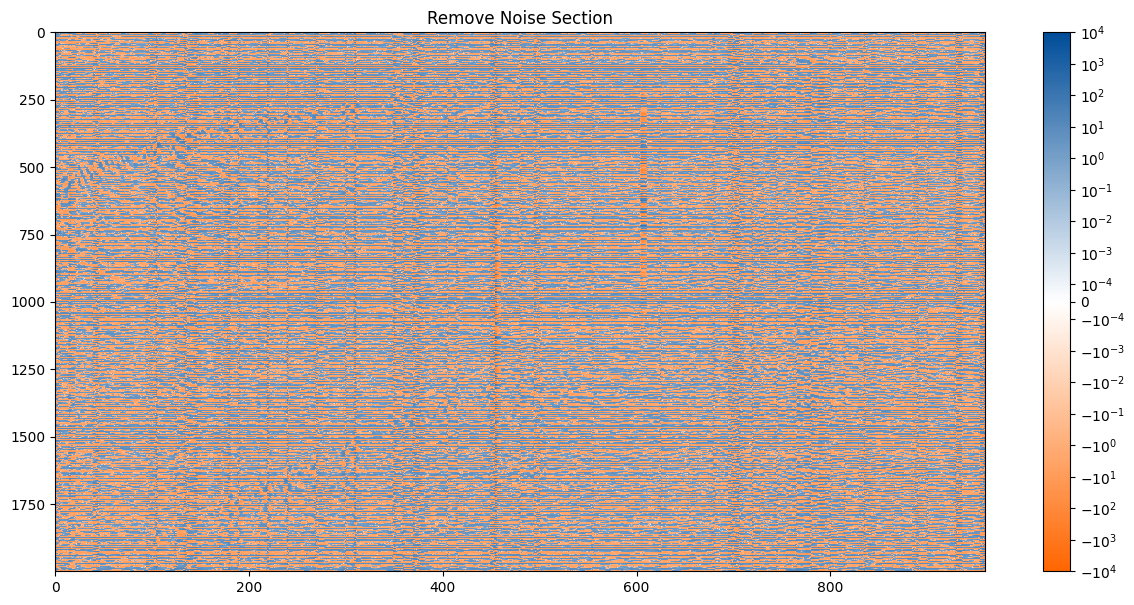

In [6]:

# Noisy DAS Data.
# Reading DAS data (FORGE Example).
f = h5py.File(r'../data/eq-' +str(eq) + '.mat')
dn = np.array(np.transpose(f.get('d1')))

plt.figure(figsize=(15,7))
plt.imshow(dn, cmap=cmaps['bluorange'], 
           norm=SymLogNorm(linthresh=1e-4, linscale=0.5, vmin=-1e4, vmax=1e4, base=10))
plt.axis('tight')
plt.colorbar();
plt.title('Noisy DAS Data')


# Denoised DAS Data.
plt.figure(figsize=(15,7))
plt.imshow(d2, cmap=cmaps['bluorange'], 
           norm=SymLogNorm(linthresh=1e-4, linscale=0.5, vmin=-1e4, vmax=1e4, base=10))
plt.axis('tight')
plt.colorbar();
plt.title('Denoised DAS Data')


# Remove Noise Section.
plt.figure(figsize=(15,7))
plt.imshow(dn-d2, cmap=cmaps['bluorange'], 
           norm=SymLogNorm(linthresh=1e-4, linscale=0.5, vmin=-1e4, vmax=1e4, base=10))
plt.axis('tight')
plt.colorbar();
plt.title('Remove Noise Section')
